In [22]:
import pandas as pd
import numpy as np
from numpy import log2 as log

In [23]:
dataset = [
    ['<21', 'High', 'Male', 'Single', 'No'],
    ['<21', 'High', 'Male', 'Married', 'No'],
    ['21-35', 'High', 'Male', 'Single', 'Yes'],
    ['>35', 'Medium', 'Male', 'Single', 'Yes'],
    ['>35', 'Low', 'Female', 'Single', 'Yes'],
    ['>35', 'Low', 'Female', 'Married', 'No'],
    ['21-35', 'Low', 'Female', 'Married', 'Yes'],
    ['<21', 'Medium', 'Male', 'Single', 'No'],
    ['<21', 'Low', 'Female', 'Married', 'Yes'],
    ['>35', 'Medium', 'Female', 'Single', 'Yes'],
    ['<21', 'Medium', 'Female', 'Married', 'Yes'],
    ['21-35', 'Medium', 'Male', 'Married', 'Yes'],
    ['21-35', 'High', 'Female', 'Single', 'Yes'],
    ['>35', 'Medium', 'Male', 'Married', 'No']
]

In [24]:
columns = ['Age', 'Income', 'Gender', 'Marital Status', 'Buys']
df = pd.DataFrame(dataset, columns=columns)
df

,Age,Income,Gender,Marital Status,Buys
0,<21,High,Male,Single,No
1,<21,High,Male,Married,No
2,21-35,High,Male,Single,Yes
3,>35,Medium,Male,Single,Yes
4,>35,Low,Female,Single,Yes
5,>35,Low,Female,Married,No
6,21-35,Low,Female,Married,Yes
7,<21,Medium,Male,Single,No
8,<21,Low,Female,Married,Yes
9,>35,Medium,Female,Single,Yes


In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in range(5):
    df[columns[i]] = le.fit_transform(df[columns[i]])
    
df

,Age,Income,Gender,Marital Status,Buys
0,1,0,1,1,0
1,1,0,1,0,0
2,0,0,1,1,1
3,2,2,1,1,1
4,2,1,0,1,1
5,2,1,0,0,0
6,0,1,0,0,1
7,1,2,1,1,0
8,1,1,0,0,1
9,2,2,0,1,1


In [26]:
test_data = [[1, 1, 0, 0]]
test = pd.DataFrame(test_data, columns=['Age', 'Income', 'Gender', 'Marital Status'])
test

,Age,Income,Gender,Marital Status
0,1,1,0,0


In [27]:
eps = np.finfo(float).eps

In [28]:
# Entropy
def find_entropy(df):
    Class = df.keys()[-1]
    entropy = 0
    values = df[Class].unique()
    
    for value in values:
        fraction = df[Class].value_counts()[value]/len(df[Class])
        entropy += -fraction * np.log2(fraction)
        print("Class : ", Class, " E(S) : ", entropy)
        
    return entropy

In [29]:
# Entropy of attributes

def find_entropy_attribute(df, attribute):
    Class = df.keys()[-1]
    target_variables = df[Class].unique()
    variables = df[attribute].unique()
    entropy2 = 0
    
    for variable in variables:
        entropy = 0
        
        for target_variable in target_variables:
            num = len(df[attribute][df[attribute] == variable][df[Class]==target_variable])
            den = len(df[attribute][df[attribute] == variable])
            fraction = num/(den+eps)
            entropy += -fraction*log(fraction+eps)
            
        fraction2 = den/len(df)
        entropy2 += -fraction2*entropy
    
        print("Class : ", Class, " E(T, X) : ", entropy2)
        
    return abs(entropy2)

In [30]:
# Find root node / Gain

def find_winner(df):
    IG = []
    
    for key in df.keys()[:-1]:
        IG.append(find_entropy(df)-find_entropy_attribute(df, key))
        print(np.argmax(IG))
        
    return df.keys()[:-1][np.argmax(IG)]

In [31]:
def get_subtable(df, node, value):
    return df[df[node]==value].reset_index(drop = True)

In [32]:
def build_tree(df, tree=None):
    Class = df.keys()[-1]
    
#     get attribute with max info gain
    node = find_winner(df)
    print("Node or attribute with maximum info gain: ", node)
    
#     get distinct values of that node
    attrValue = np.unique(df[node])
    print("Distinct Values found: ", attrValue)
    
#   Create empty dictionary to create treee
    if tree is None:
        tree = {}
        tree[node] = {}
        
#    Check if subset is pure and stop if it is
    for value in attrValue:
        subtable = get_subtable(df, node, value)
        print("Subtable\n", subtable)
        
        clValue, counts = np.unique(subtable['Buys'], return_counts = True)
        
        print("clValue : ", clValue)
        print("Counts : ", counts)
        
        if(len(counts)==1):
            tree[node][value] = clValue[0]
        else:
            tree[node][value] = build_tree(subtable)
            
    return tree

In [33]:
dtree = build_tree(df)
dtree

Class :  Buys  E(S) :  0.5305095811322292
Class :  Buys  E(S) :  0.9402859586706311
Class :  Buys  E(T, X) :  -0.34676806944809574
Class :  Buys  E(T, X) :  -0.34676806944809563
Class :  Buys  E(T, X) :  -0.6935361388961914
0
Class :  Buys  E(S) :  0.5305095811322292
Class :  Buys  E(S) :  0.9402859586706311
Class :  Buys  E(T, X) :  -0.28571428571428553
Class :  Buys  E(T, X) :  -0.6792696431662093
Class :  Buys  E(T, X) :  -0.9110633930116756
0
Class :  Buys  E(S) :  0.5305095811322292
Class :  Buys  E(S) :  0.9402859586706311
Class :  Buys  E(T, X) :  -0.49261406801712543
Class :  Buys  E(T, X) :  -0.7884504573082889
0
Class :  Buys  E(S) :  0.5305095811322292
Class :  Buys  E(S) :  0.9402859586706311
Class :  Buys  E(T, X) :  -0.43156028428331517
Class :  Buys  E(T, X) :  -0.9241743523004406
0
Node or attribute with maximum info gain:  Age
Distinct Values found:  [0 1 2]
Subtable
    Age  Income  Gender  Marital Status  Buys
0    0       0       1               1     1
1    0      

{'Age': {0: 1,
  1: {'Gender': {0: 1, 1: 0}},
  2: {'Marital Status': {0: 0, 1: 1}}}}

In [37]:
def predict(inst, tree):
    for nodes in tree.keys():
        value = inst[nodes]
        tree = tree[nodes][value]
        
        prediction = 0
        
        if type(tree) is dict:
            prediction = predict(inst, tree)
        else:
            prediction = tree
            break;
        
    return prediction

In [38]:
tester = test.iloc[0]
Prediction = predict(tester, dtree)

In [39]:
Prediction

1

In [43]:
# Decision Tree Using Library

from sklearn.tree import DecisionTreeClassifier, plot_tree

df2 = df.copy()

df2.drop('Buys', axis = 1, inplace = True)

X = df2

y = df['Buys']

sk_dtree = DecisionTreeClassifier(criterion="entropy")

sk_dtree.fit(X, y)

sk_prediction = sk_dtree.predict(test)

In [44]:
sk_prediction

array([1])

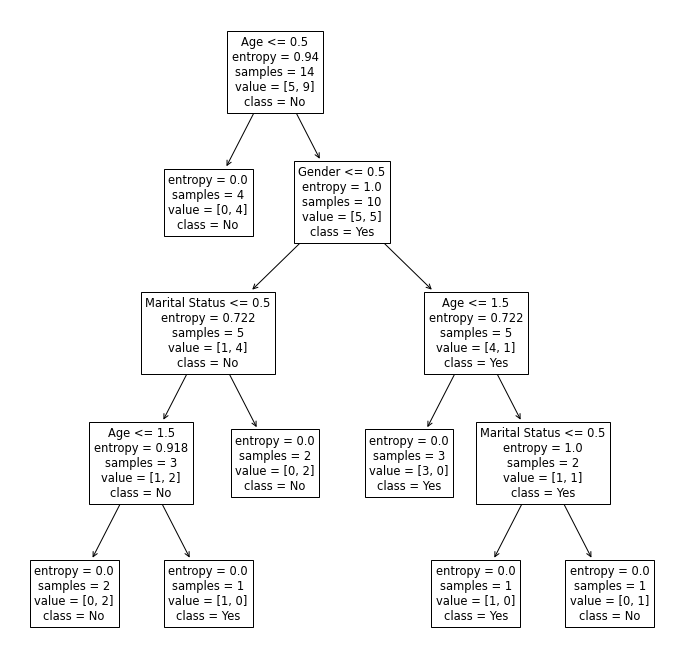

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
dec_tree = plot_tree(decision_tree=sk_dtree, feature_names = df.columns, class_names=["Yes", "No"])

plt.show()

In [49]:
dtree

{'Age': {0: 1,
  1: {'Gender': {0: 1, 1: 0}},
  2: {'Marital Status': {0: 0, 1: 1}}}}